In [1]:
library(Seurat)
library(limma)
library(ggplot2)
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
# suppressPackageStartupMessages(library(refGenome))
suppressPackageStartupMessages(library(future))
suppressPackageStartupMessages(library(ggrepel))
options(future.globals.maxSize= 8*1024^3)
source('/home/z4li/zhen/scripts/R/functions/markers.R')
source('/home/z4li/zhen/scripts/R/functions/gg_color_hue.R')
source('/home/z4li/zhen/scripts/R/functions/heatmap.3.R')

Attaching SeuratObject



In [5]:
experiment.merged<-readRDS("2022-01-15_Nowakowski_et_al_2017_Science.rds")

In [6]:
experiment.merged@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,WGCNAcluster,Name,Age_in_Weeks,RegionName,Laminae,Area,RNA_snn_res.0.07,seurat_clusters,cell_type,blue.eigengene,grey.eigengene,brown.eigengene,turquoise.eigengene,total.eigengene,yellow.eigengene
,<fct>,<dbl>,<int>,<fct>,<chr>,<dbl>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hi_GW21_5.Hi_GW21_5,2nd_trimester_ctx,980899.6,5434,tRG,Sample1,19.0,Cortex,All,0,4,4,tRG,0.0049596771,0.0057352226,-0.002101526,-0.0015201815,0.0069197299,-0.002101526
Hi_GW21_8.Hi_GW21_8,2nd_trimester_ctx,981708.6,6885,RG-div1,Sample1,19.0,Cortex,All,0,3,3,RG-div,0.0004542436,0.0119047551,-0.002101526,0.0302120296,0.0223719298,-0.002101526
Hi_GW21_1.Hi_GW21_1,2nd_trimester_ctx,974322.3,4628,nEN-early2,Sample1,19.0,Cortex,All,0,0,0,nEN-early,0.0082542534,0.0045032719,-0.002101526,-0.0067658380,0.0006040369,-0.002101526
Hi_GW21_2.Hi_GW21_2,2nd_trimester_ctx,971912.8,4779,nEN-early2,Sample1,19.0,Cortex,All,0,0,0,nEN-early,0.0372298276,-0.0111571617,-0.002101526,0.0143473124,0.0106592881,-0.002101526
Hi_GW21_3.Hi_GW21_3,2nd_trimester_ctx,977106.3,3873,nEN-late,Sample1,19.0,Cortex,All,0,0,0,nEN-late,0.0199710669,-0.0082493489,-0.002101526,-0.0066476258,-0.0043050822,-0.002101526
Hi_GW21_7.Hi_GW21_7,2nd_trimester_ctx,974071.3,5051,EN-V1-2,Sample1,19.0,Cortex,All,0,0,0,EN,0.0133250778,0.0218181272,-0.002101526,-0.0011841800,0.0170991421,-0.002101526
Hi_GW21_6.Hi_GW21_6,2nd_trimester_ctx,973159.1,4245,EN-V1-2,Sample1,19.0,Cortex,All,0,1,1,EN,0.0397936567,0.0100201151,-0.002101526,0.0076305263,0.0218728324,-0.002101526
Hi_GW16_11.Hi_GW16_11,2nd_trimester_ctx,991131.6,2990,vRG,Sample2,14.0,Cortex,SVZ,0,4,4,vRG,-0.0176549806,-0.0142442096,-0.002101526,0.0100005732,-0.0075620319,-0.002101526
Hi_GW16_3.Hi_GW16_3,2nd_trimester_ctx,985473.8,4938,RG-div2,Sample2,14.0,Cortex,SVZ,0,3,3,RG-div,-0.0149139366,-0.0035508466,-0.002101526,0.0202933946,0.0054943891,-0.002101526


# Figure 5a

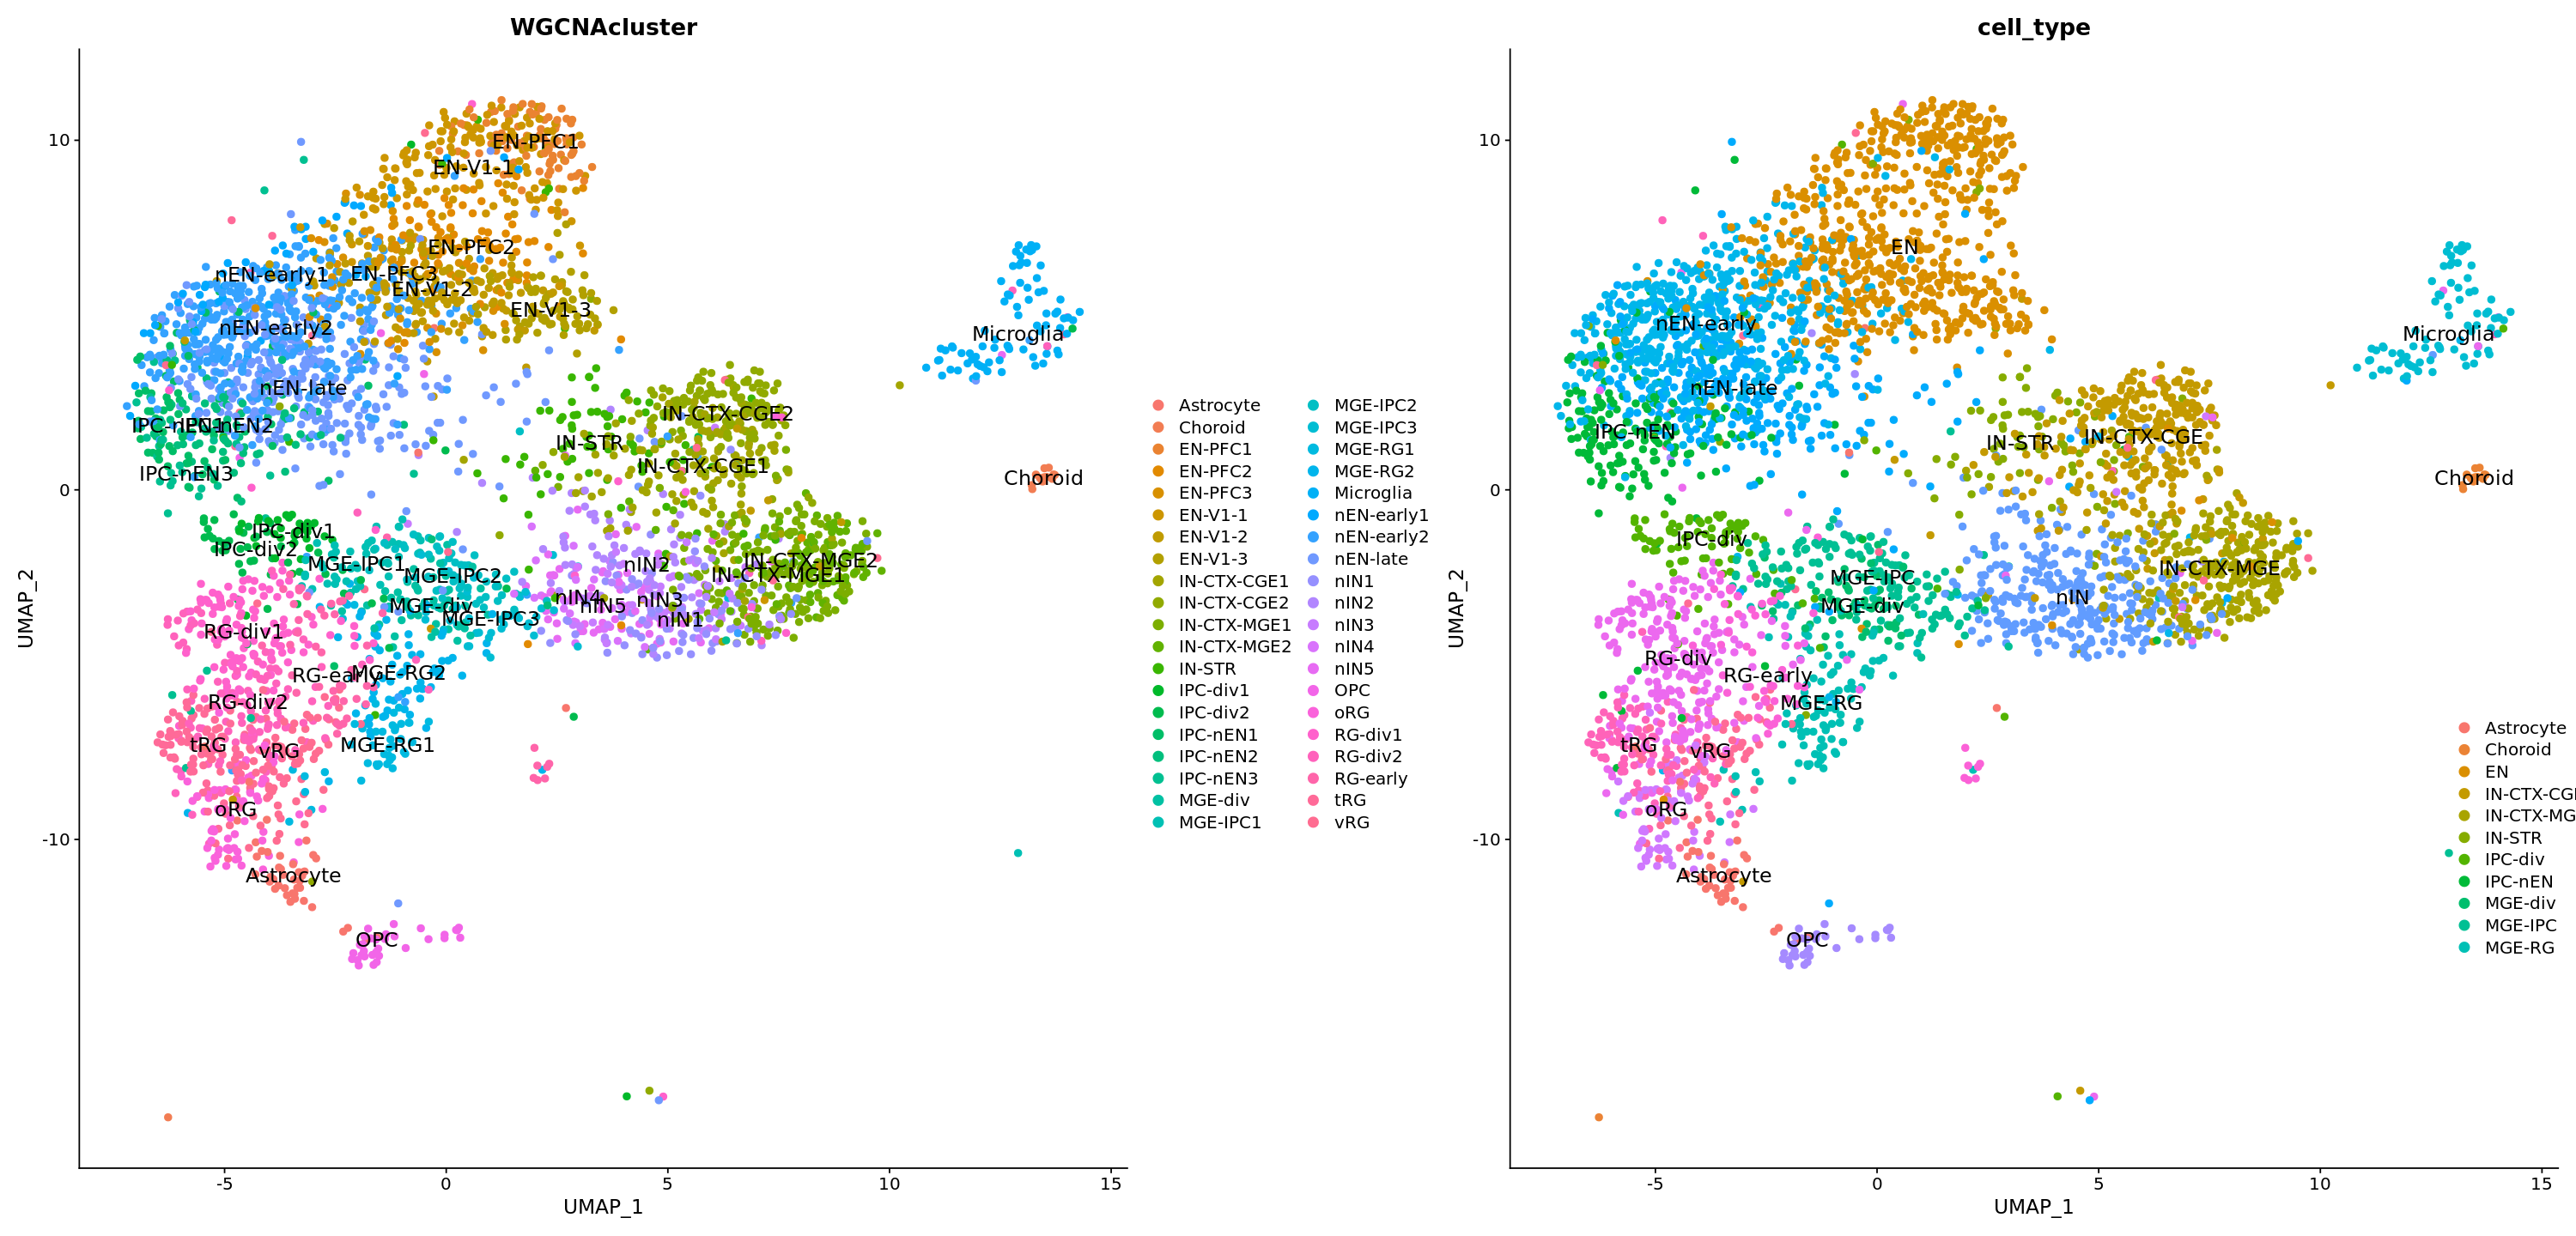

In [7]:
options(repr.plot.width=25, repr.plot.height=12)
DimPlot(object = experiment.merged, 
        reduction = "umap", 
        group.by = c('WGCNAcluster','cell_type'),
        label = T,
        pt.size = 2,
        label.size = 5) + 
        theme(legend.position = c(0.9, 0.3))

# Figure 5b

In [8]:
aaa <- read.csv("../FCD_gene_list.csv", header=TRUE)

In [9]:
aaa$X

[1] "AKT3"     "ARHGEF37" "ASH1L"    "ATP2A1"   "BRAF"     "C9orf3"  
 [7] "CANT1"    "CASK"     "CELSR1"   "CELSR2"   "CSMD3"    "DNAJA3"  
[13] "EEF2"     "EIF4G1"   "ENPP7"    "EPG5"     "EYA1"     "FAM161B" 
[19] "FBXL12"   "FGFR2"    "GPC4"     "GRIN2C"   "HEPH"     "HIP1"    
[25] "IRF8"     "KIF23"    "KIF26B"   "KLHL22"   "KRAS"     "KRTAP9-8"
[31] "LRP11"    "MAPK9"    "MED13"    "MTOR"     "N4BP2L2"  "NAV2"    
[37] "NF1"      "NFAT5"    "NIPBL"    "NOD2"     "NPRL3"    "NRDC"    
[43] "NUP214"   "OR2M5"    "PCNT"     "PGBD2"    "PIK3CA"   "PIK3R3"  
[49] "PPFIA4"   "PPM1F"    "PPP2R5D"  "PRR14"    "PSEN2"    "PTPN11"  
[55] "RELN"     "RHEB"     "RHOA"     "RRAGA"    "RYR2"     "RYR3"    
[61] "SARM1"    "SLC24A2"  "SLC35A2"  "SPTA1"    "SRCAP"    "SYTL3"   
[67] "TRANK1"   "TRIP12"   "TSC2"     "TTN"      "USP6"     "UTRN"    
[73] "VSIG4"    "ZNF335"   "ZNF423"

In [10]:
aaa$X[aaa$X=="KRTAP9-8"]<-"KRTAP9.8"
aaa$X[aaa$X=="NRDC"]<-"NRD1"

In [11]:
aaa$X

[1] "AKT3"     "ARHGEF37" "ASH1L"    "ATP2A1"   "BRAF"     "C9orf3"  
 [7] "CANT1"    "CASK"     "CELSR1"   "CELSR2"   "CSMD3"    "DNAJA3"  
[13] "EEF2"     "EIF4G1"   "ENPP7"    "EPG5"     "EYA1"     "FAM161B" 
[19] "FBXL12"   "FGFR2"    "GPC4"     "GRIN2C"   "HEPH"     "HIP1"    
[25] "IRF8"     "KIF23"    "KIF26B"   "KLHL22"   "KRAS"     "KRTAP9.8"
[31] "LRP11"    "MAPK9"    "MED13"    "MTOR"     "N4BP2L2"  "NAV2"    
[37] "NF1"      "NFAT5"    "NIPBL"    "NOD2"     "NPRL3"    "NRD1"    
[43] "NUP214"   "OR2M5"    "PCNT"     "PGBD2"    "PIK3CA"   "PIK3R3"  
[49] "PPFIA4"   "PPM1F"    "PPP2R5D"  "PRR14"    "PSEN2"    "PTPN11"  
[55] "RELN"     "RHEB"     "RHOA"     "RRAGA"    "RYR2"     "RYR3"    
[61] "SARM1"    "SLC24A2"  "SLC35A2"  "SPTA1"    "SRCAP"    "SYTL3"   
[67] "TRANK1"   "TRIP12"   "TSC2"     "TTN"      "USP6"     "UTRN"    
[73] "VSIG4"    "ZNF335"   "ZNF423"

In [15]:
library(WGCNA)
options(stringsAsFactors = F)
datExpr <- t(as.matrix(GetAssayData(experiment.merged)))[,aaa$X]  # only use variable genes in analysis

In [13]:
net <- blockwiseModules(datExpr, power = 10,
  corType = "bicor", # use robust correlation
	networkType = "signed", minModuleSize = 10,
	reassignThreshold = 0, mergeCutHeight = 0.15,
	numericLabels = F, pamRespectsDendro = FALSE,
	saveTOMs = TRUE,
	saveTOMFileBase = "TOM",
	verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file TOM-block.1.RData
 ....clustering..
 ....detecting modules..
 No modules detected in block 1
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15


Warning message in blockwiseModules(datExpr, power = 10, corType = "bicor", networkType = "signed", :
“blockwiseModules: mergeCloseModules failed with the following error message:
     Error in mergeCloseModules(datExpr, colors[gsg$goodGenes], cutHeight = mergeCutHeight,  : 
  Error in moduleEigengenes(expr = exprData[[set]]$data, colors = setColors,  : 
  Color levels are empty. Possible reason: the only color is grey and grey module is excluded from the calculation.

 
--> returning unmerged colors.
”


In [14]:
table(net$colors)


grey 
  75 

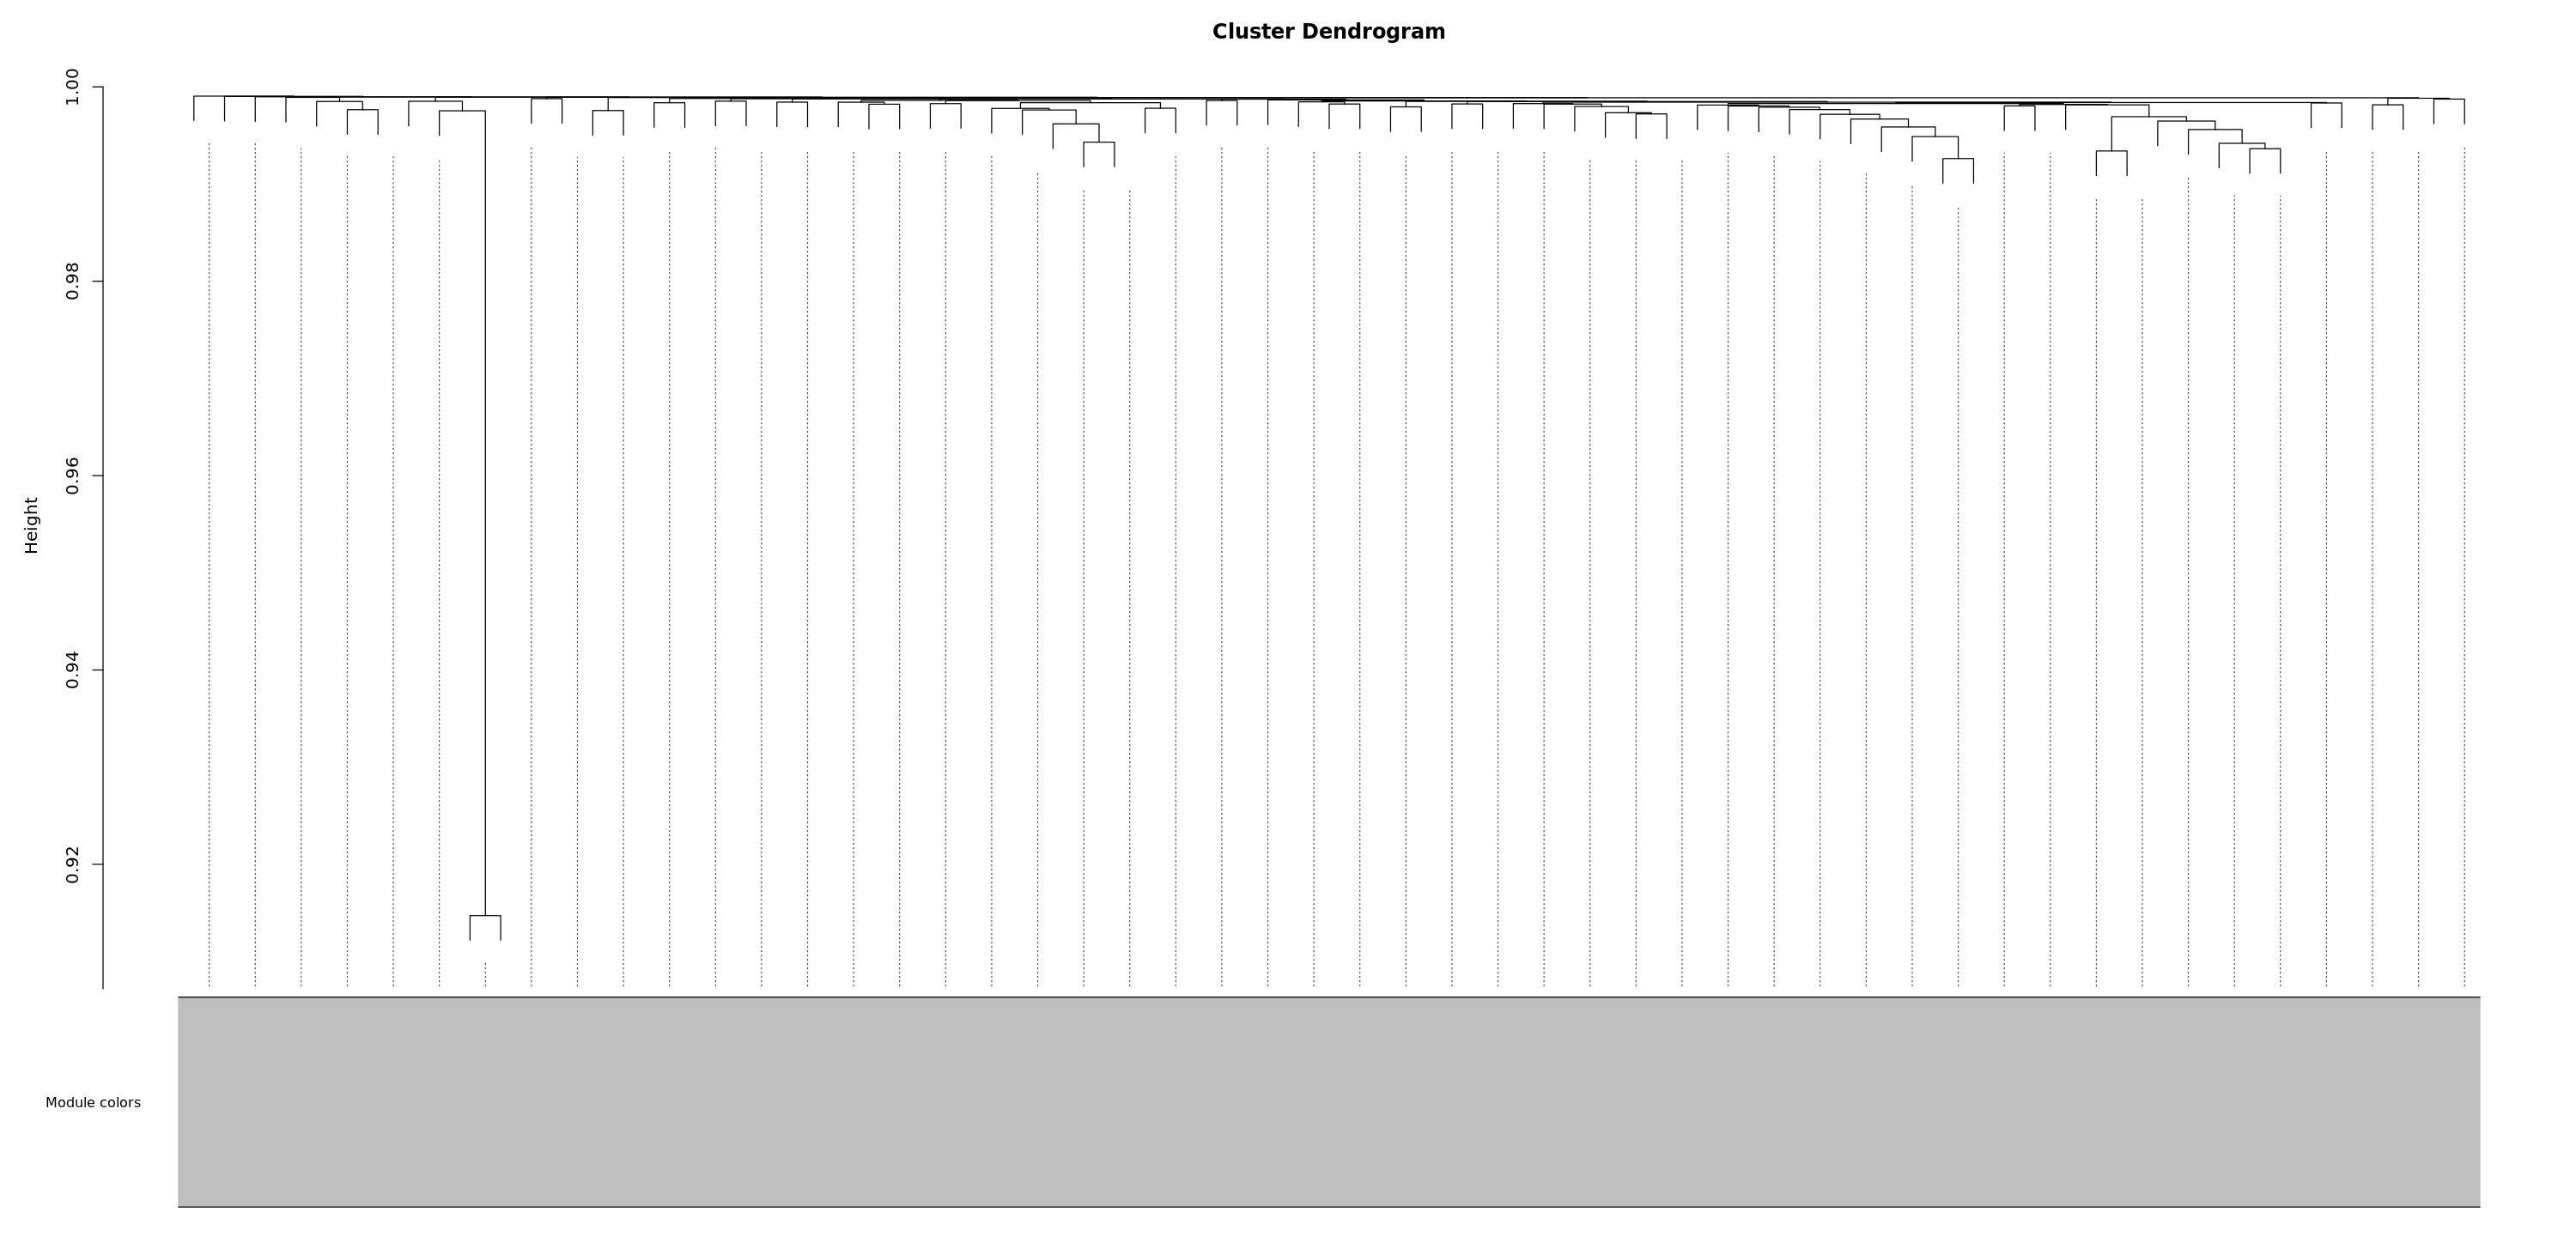

In [16]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

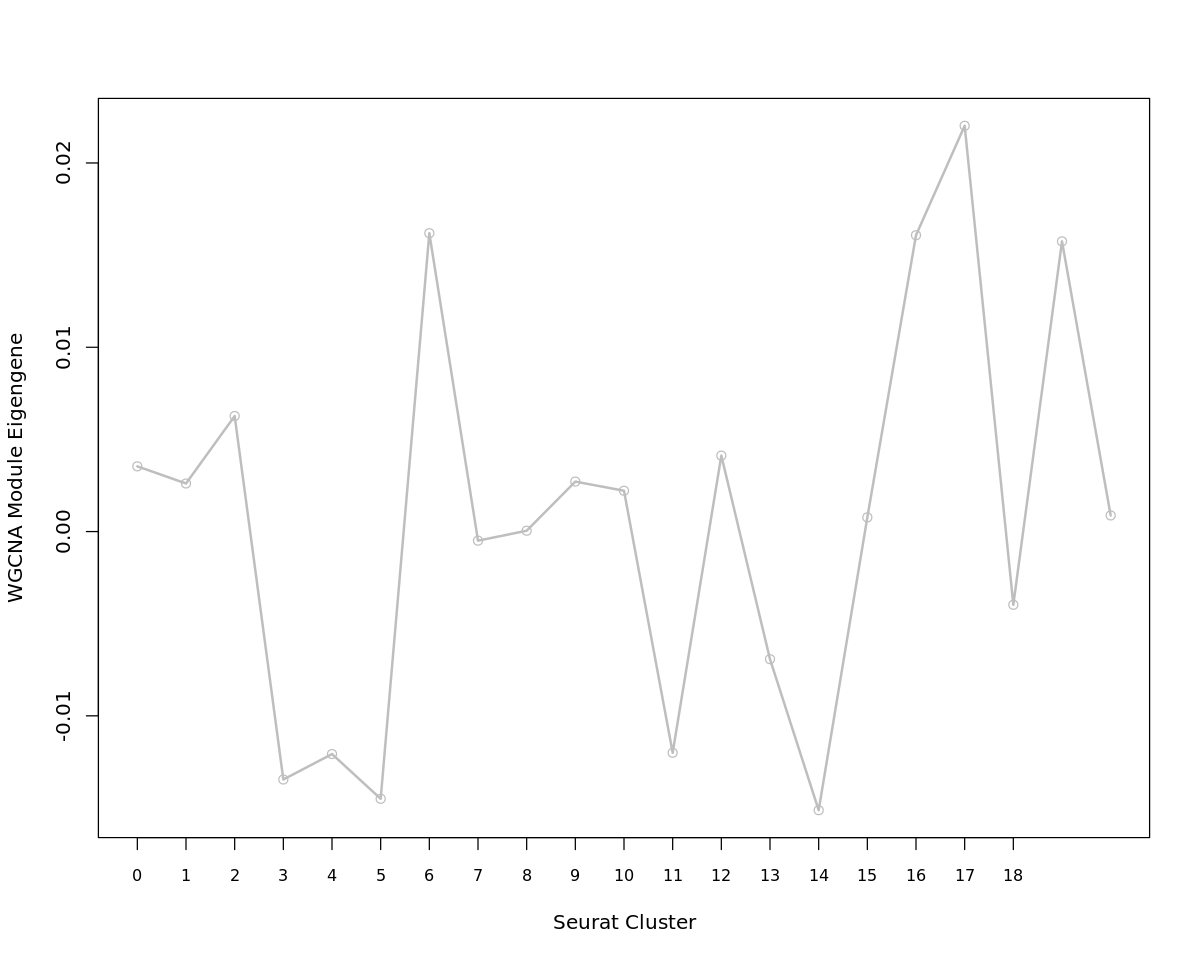

In [17]:
options(repr.plot.width=10, repr.plot.height=8)

f <- function(module){
  eigengene <- unlist(net$MEs[paste0("ME", module)])
  means <- tapply(eigengene, Idents(experiment.merged), mean, na.rm = T)
  return(means)
}
modules <- c("grey")
plotdat <- sapply(modules, f)
matplot(plotdat, col = modules, type = "l", lwd = 2, xaxt = "n", xlab = "Seurat Cluster",
        ylab = "WGCNA Module Eigengene")
axis(1, at = 1:19, labels = 0:18, cex.axis = 0.8)
matpoints(plotdat, col = modules, pch = 21)

In [18]:
options(repr.plot.width=10, repr.plot.height=8)

f <- function(module){
  eigengene <- unlist(net$MEs[paste0("ME", module)])
  means <- tapply(eigengene, Idents(experiment.merged), mean, na.rm = T)
  return(means)
}
modules <- c("grey")
plotdat <- sapply(modules, f)

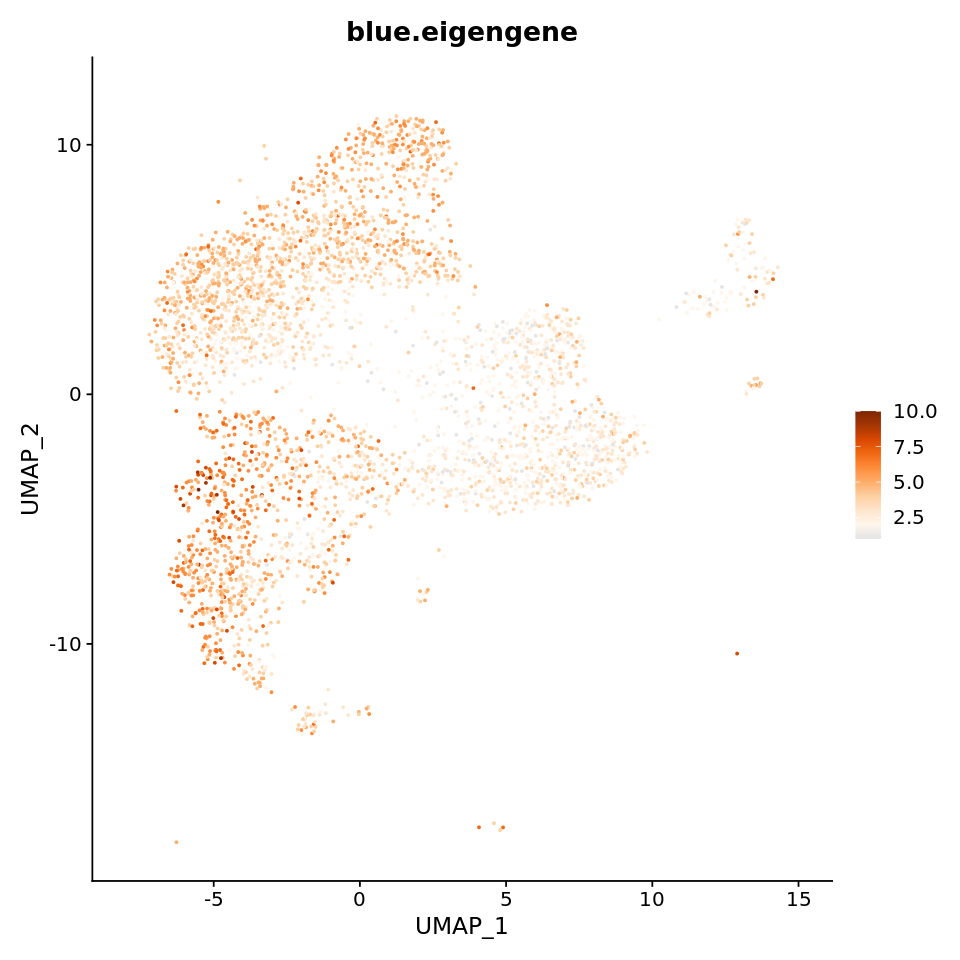

In [23]:
options(repr.plot.width=8, repr.plot.height=8)
blue.eigengene <- unlist(net$MEs[paste0("ME", "grey")])
names(blue.eigengene) <- rownames(datExpr)
experiment.merged$blue.eigengene <- blue.eigengene
FeaturePlot(experiment.merged, features = "blue.eigengene", cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges'))
    )

# Figure 5c

In [24]:
suppressPackageStartupMessages(library(future))
suppressPackageStartupMessages(library(WGCNA))
suppressPackageStartupMessages(library(lsa))

In [25]:
df0<-experiment.merged

In [26]:
allowWGCNAThreads(nThreads = 24)

Allowing multi-threading with up to 24 threads.


In [27]:
rExpr <- t(as.matrix(GetAssayData(experiment.merged)))[,aaa$X]

In [28]:
powers = c(seq(from = 1, to=20, by=1))

In [29]:
sft <- pickSoftThreshold(rExpr, 
                         powerVector = powers, 
                         verbose = 0,
                         corFnc = "cor",
                         corOptions = list(method="p"),
                         networkType = "signed hybrid")

   Power SFT.R.sq  slope truncated.R.sq  mean.k. median.k.   max.k.
1      1   0.0298 -0.117          0.307 1.76e+00  1.72e+00 3.57e+00
2      2   0.7720 -1.090          0.727 1.08e-01  8.78e-02 3.81e-01
3      3   0.3310 -5.050          0.220 1.34e-02  5.21e-03 1.91e-01
4      4   0.2990 -3.170          0.722 3.86e-03  3.44e-04 1.08e-01
5      5   0.3630 -2.720          0.699 1.80e-03  2.33e-05 6.21e-02
6      6   0.4000 -2.370          0.685 9.75e-04  1.70e-06 3.56e-02
7      7   0.4230 -2.100          0.675 5.50e-04  1.41e-07 2.04e-02
8      8   0.4400 -1.900          0.669 3.14e-04  1.35e-08 1.17e-02
9      9   0.4530 -1.730          0.664 1.80e-04  1.00e-09 6.73e-03
10    10   0.4620 -1.590          0.660 1.03e-04  9.92e-11 3.86e-03
11    11   0.4700 -1.480          0.656 5.90e-05  9.90e-12 2.21e-03
12    12   0.4770 -1.370          0.654 3.39e-05  9.73e-13 1.27e-03
13    13   0.4830 -1.290          0.651 1.94e-05  8.73e-14 7.28e-04
14    14   0.4870 -1.210          0.649 1.11e-05

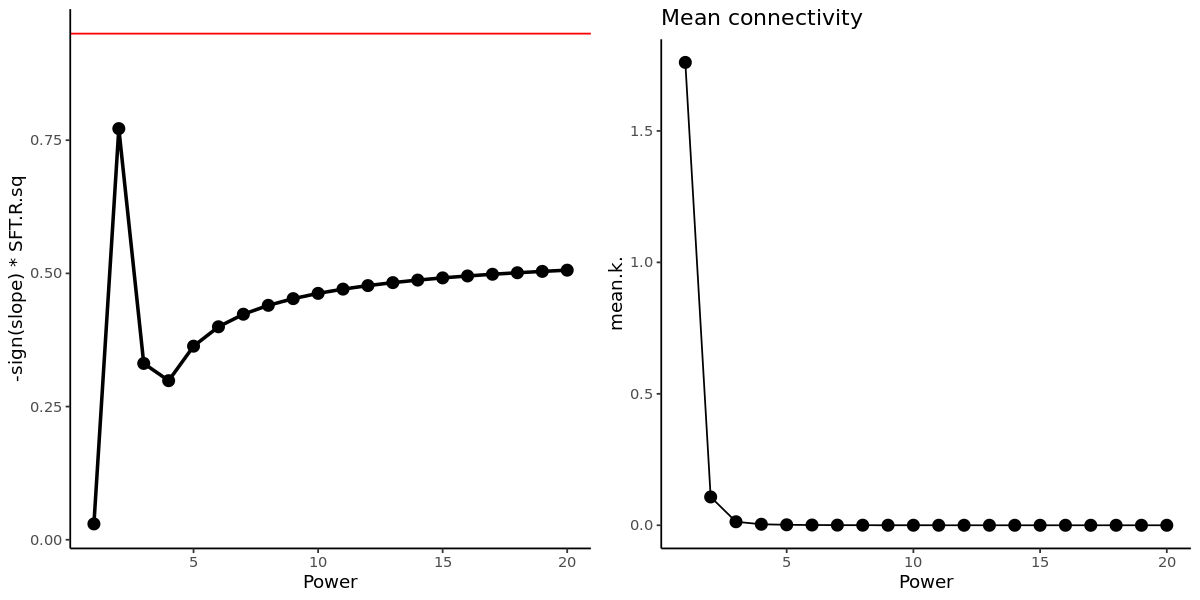

In [30]:
options(repr.plot.width = 10, repr.plot.height = 5)

g1 <- ggplot(data = sft$fitIndices, aes(x = Power, y = -sign(slope)*SFT.R.sq)) +
  geom_point(size = 3) +
  geom_line(size = 1) +
  geom_hline(aes(yintercept = 0.95), colour = "red") +
    theme_classic()

g2 <- ggplot(data = sft$fitIndices, aes(x = Power, y = mean.k.)) +
  geom_point(size = 3) +
  geom_line(size = 0.5) +
  ggtitle(label = "Mean connectivity") +
    theme_classic()

gridExtra::grid.arrange(g1, g2, ncol = 2)

In [31]:
softPower = 2

In [32]:
plan(strategy = "multicore")
cor <- cor(rExpr, method = "p")
plan(strategy = "sequential")

In [33]:
plan(strategy = "multicore")
cor  <- cosine(rExpr)
plan(strategy = "sequential")

In [34]:
adj = adjacency.fromSimilarity(cor, type = "signed hybrid", power = softPower)

In [35]:
TOM = TOMsimilarity(adj, TOMDenom = "mean")

..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


In [36]:
colnames(TOM) <- rownames(TOM) <- colnames(rExpr)
dissTOM <- 1 - TOM
geneTree <- hclust(as.dist(dissTOM), method="average");

In [37]:
# Set the minimum module size
minModuleSize = 30;
# Module identification using dynamic tree cut
dynamicMods = cutreeDynamic(dendro = geneTree,
                            cutHeight = 1,
                            method="hybrid",
                            deepSplit = 4,
#                             minAbsSplitHeight = 0.995,
                            minClusterSize = minModuleSize,
                            distM = dissTOM);

 ..done.


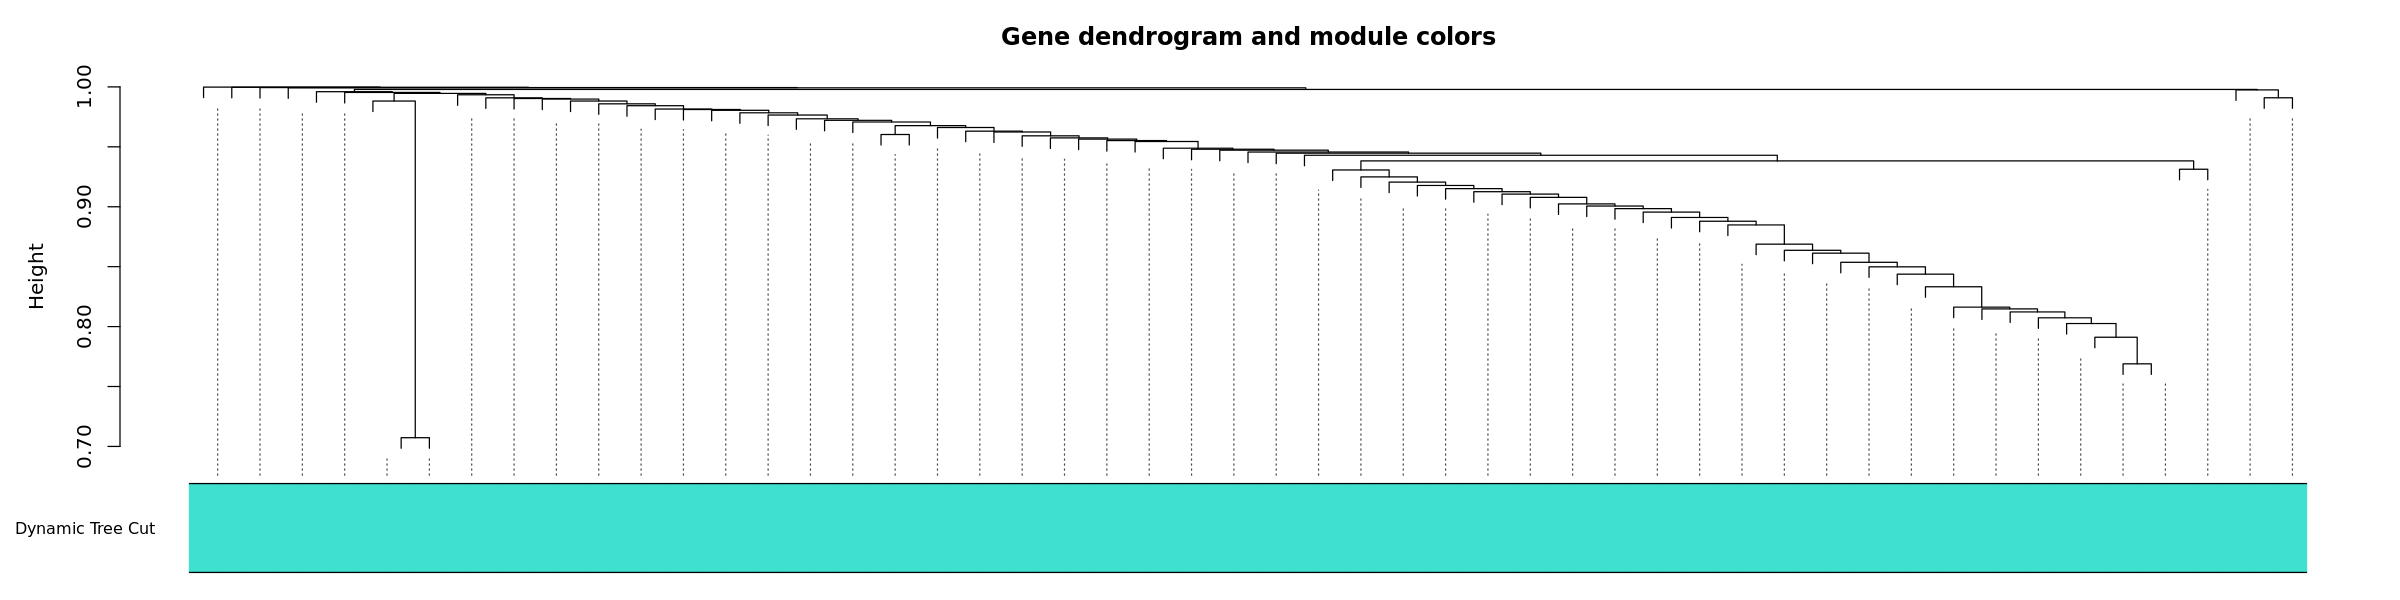

In [38]:
#Plot the module assignment under the dendrogram; note: The grey color is reserved for unassigned genes
dynamicColors = labels2colors(dynamicMods)
#table(dynamicColors)
options(repr.plot.width=20, repr.plot.height=5)
plotDendroAndColors(geneTree, 
                    dynamicColors, 
                    "Dynamic Tree Cut", 
                    dendroLabels = FALSE, 
                     hang = 0.03, 
                    addGuide = TRUE, 
                    guideHang = 0.05, 
                    main = "Gene dendrogram and module colors")

In [39]:
MEs <- moduleEigengenes(as.matrix(rExpr), dynamicColors)
MEs <- orderMEs(MEs$eigengenes)

In [40]:
## Merge similar modules
options(repr.plot.width = 10, repr.plot.height = 5)
MEDiss = 1-cor(MEs)
METree = hclust(as.dist(MEDiss), method = "average")
plot(METree, main = "Clustering of module eigengenes", xlab = "", sub = "")
MEDissThres = 0.25
abline(h=MEDissThres, col = "red", lty = 2)

ERROR: Error in hclust(as.dist(MEDiss), method = "average"): N must be at least 2.


In [41]:
merge <- mergeCloseModules(rExpr, dynamicColors, cutHeight = MEDissThres, verbose = 3)
MEs2 <- merge$newMEs
dynamicColors2 <- merge$colors

ERROR: Error in paste(spaces, "mergeCloseModules: Merging modules whose distance is less than", : object 'MEDissThres' not found


In [42]:
moduleTraitCor <- list()
moduleTraitPvalue <- list()
header = as.character(df0@meta.data$cell_type) #as.character(paste(GB$Species,  GB$Time_point, GB$IDX))
for(i in unique(header)[order(unique(header))]){
  h <- header
  h[header != i] <- 0
  h[header == i] <- 1
  moduleTraitCor[[i]] <- cor(MEs, as.numeric(h), use = "p")
  moduleTraitPvalue[[i]] <- corPvalueStudent(moduleTraitCor[[i]], nrow(rExpr))
}

moduleTraitCor <- do.call(cbind, moduleTraitCor)
moduleTraitPvalue <- do.call(cbind, moduleTraitPvalue)
colnames(moduleTraitCor) <- sort(unique(header))
colnames(moduleTraitPvalue) <- sort(unique(header))
textMatrix = paste(signif(moduleTraitCor, 2), "\n(",
                   signif(moduleTraitPvalue, 1), ")", sep = "");

In [43]:

MEs
as.numeric(h)

MEturquoise
<dbl>
0.0069197299
0.0223719298
0.0006040369
0.0106592881
-0.0043050822
0.0170991421
0.0218728324
-0.0075620319
0.0054943891


[1] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 [778] 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 [815] 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 [926] 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1037] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
[1074] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
[1111] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
[1148] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1185] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
[1222] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
[1259] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1296] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1370] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1407] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1444] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1481] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1518] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1555] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1592] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
[1629] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1666] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
[1703] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1740] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1777] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1814] 1 0 0 0 0 0 0 0 0 0 0 0 0 0

In [44]:
res <- reshape2::melt(moduleTraitPvalue)

In [45]:
to.plot <- reshape2::melt(moduleTraitCor)

In [46]:
to.plot$p_value <- res$value

In [47]:
#to.plot$value[to.plot$value <= 0] <- NA

In [48]:
to.plot$Var2

[1] Astrocyte  Choroid    EN         IN-CTX-CGE IN-CTX-MGE IN-STR    
 [7] IPC-div    IPC-nEN    MGE-div    MGE-IPC    MGE-RG     Microglia 
[13] nEN-early  nEN-late   nIN        OPC        oRG        RG-div    
[19] RG-early   tRG        vRG       
21 Levels: Astrocyte Choroid EN IN-CTX-CGE IN-CTX-MGE IN-STR ... vRG

In [49]:
unique(to.plot$Var1)

[1] MEturquoise
Levels: MEturquoise

In [50]:
cell_type_modules = c("MEturquoise")

Warning message:
“Removed 8 rows containing missing values (geom_point).”


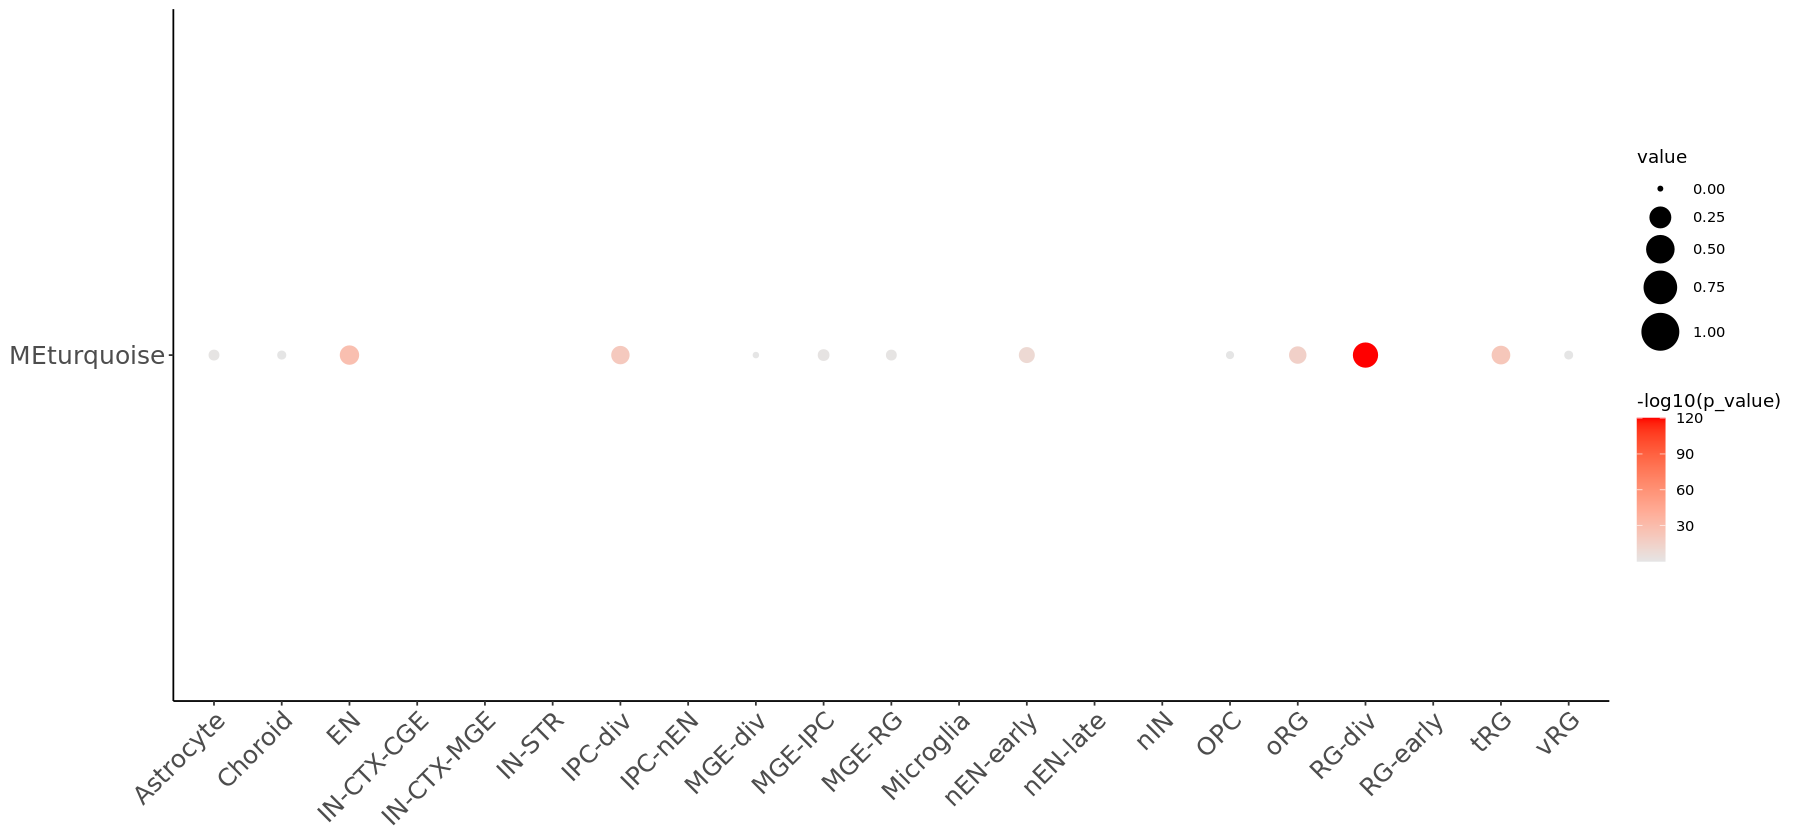

In [51]:
options(repr.plot.width = 15, repr.plot.height = 7)
to.plot %>%
    filter(Var1 %in% cell_type_modules) %>%
    mutate(Var1 = factor(Var1, 
                         levels=cell_type_modules,
                        labels = cell_type_modules)) %>%
    ggplot( aes(x = Var2, y = Var1, size = value, color = -log10(p_value))) +
      geom_point(na.rm = F) +
      scale_size_continuous(limits = c(0,1), range=c(1,10)) + 
      scale_color_continuous(low = "grey90", high = "Red", 
                             na.value = "red") +
      theme_classic()+
      theme(axis.title = element_blank(),
          axis.text.x = element_text(angle = 45,size=15,hjust = 1),
            axis.text.y = element_text(size=15),
            panel.grid.minor = element_line(color = "black"))

#purple: oligo

In [52]:
to.plot

Var1,Var2,value,p_value
<fct>,<fct>,<dbl>,<dbl>
MEturquoise,Astrocyte,0.0241418130,1.361513e-01
MEturquoise,Choroid,0.0097756793,5.462556e-01
MEturquoise,EN,0.1780905613,1.557523e-28
MEturquoise,IN-CTX-CGE,-0.2432270227,1.869533e-52
MEturquoise,IN-CTX-MGE,-0.2126982870,3.015143e-40
MEturquoise,IN-STR,-0.1335768088,1.214795e-16
MEturquoise,IPC-div,0.1527552029,2.448735e-21
MEturquoise,IPC-nEN,-0.0068514673,6.723789e-01
MEturquoise,MGE-div,0.0003481132,9.828580e-01


In [53]:
pdf("2021-01-17_FCD_gene_WGCNA_cell_type.pdf")
options(repr.plot.width = 15, repr.plot.height = 7)
to.plot %>%
    filter(Var1 %in% cell_type_modules) %>%
    mutate(Var1 = factor(Var1, 
                         levels=cell_type_modules,
                        labels = cell_type_modules)) %>%
    ggplot( aes(x = Var2, y = Var1, size = value, color = -log10(p_value))) +
      geom_point(na.rm = F) +
      scale_size_continuous(limits = c(0,1), range=c(1,10)) + 
      scale_color_continuous(low = "grey90", high = "Red", 
                             na.value = "red") +
      theme_classic()+
      theme(axis.title = element_blank(),
          axis.text.x = element_text(angle = 45,size=15,hjust = 1),
            axis.text.y = element_text(size=15),
            panel.grid.minor = element_line(color = "black"))

#purple: oligo
dev.off()

Warning message:
“Removed 8 rows containing missing values (geom_point).”


png 
  2

# Figure 5d

In [54]:
net <- blockwiseModules(datExpr, power = 3,
  corType = "bicor", # use robust correlation
	networkType = "signed", minModuleSize = 2,
	reassignThreshold = 0, mergeCutHeight = 0.85,
	numericLabels = F, pamRespectsDendro = FALSE,
	saveTOMs = TRUE,
	saveTOMFileBase = "TOM",
	verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will use 24 parallel threads.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file TOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..


Warning message in bicor(structure(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


     ..removing 30 genes from module 1 because their KME is too low.


Warning message in bicor(structure(c(0.128139215218864, 0, 0.110139188270819, 0.21690797433179, :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”
Warning message in bicor(structure(c(0.128139215218864, 0, 0.160970388560654, 2.77372838613136, :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”
Warning message in bicor(structure(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”
Warning message in bicor(structure(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, :
“bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD.”
Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual colu

 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.85


Warning message in bicor(use = "p", cosine = FALSE, maxPOutliers = 1, pearsonFallback = "individual", :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


       Calculating new MEs...


Warning message in bicor(use = "p", cosine = FALSE, maxPOutliers = 1, pearsonFallback = "individual", :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


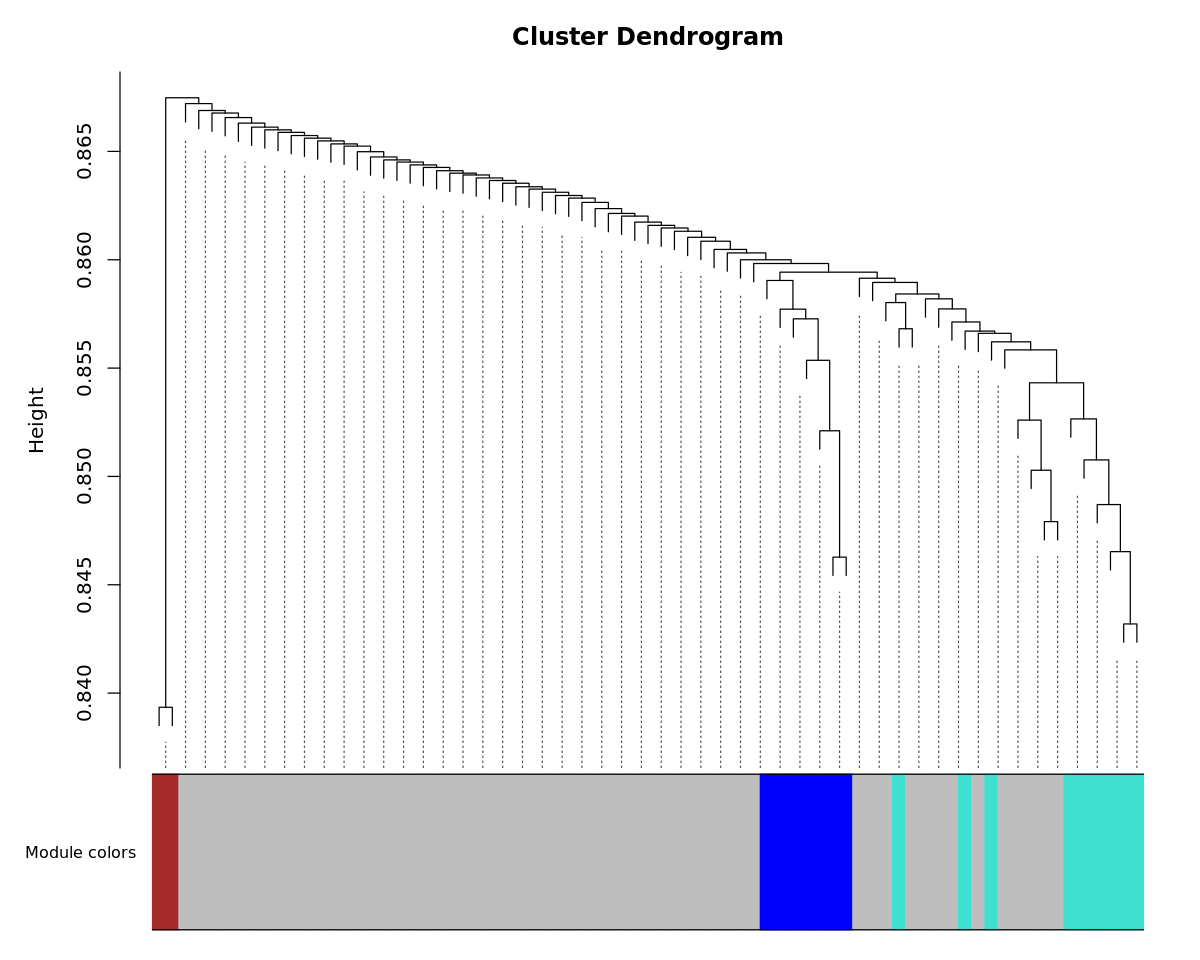

In [56]:
options(repr.plot.width=10, repr.plot.height=8)
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

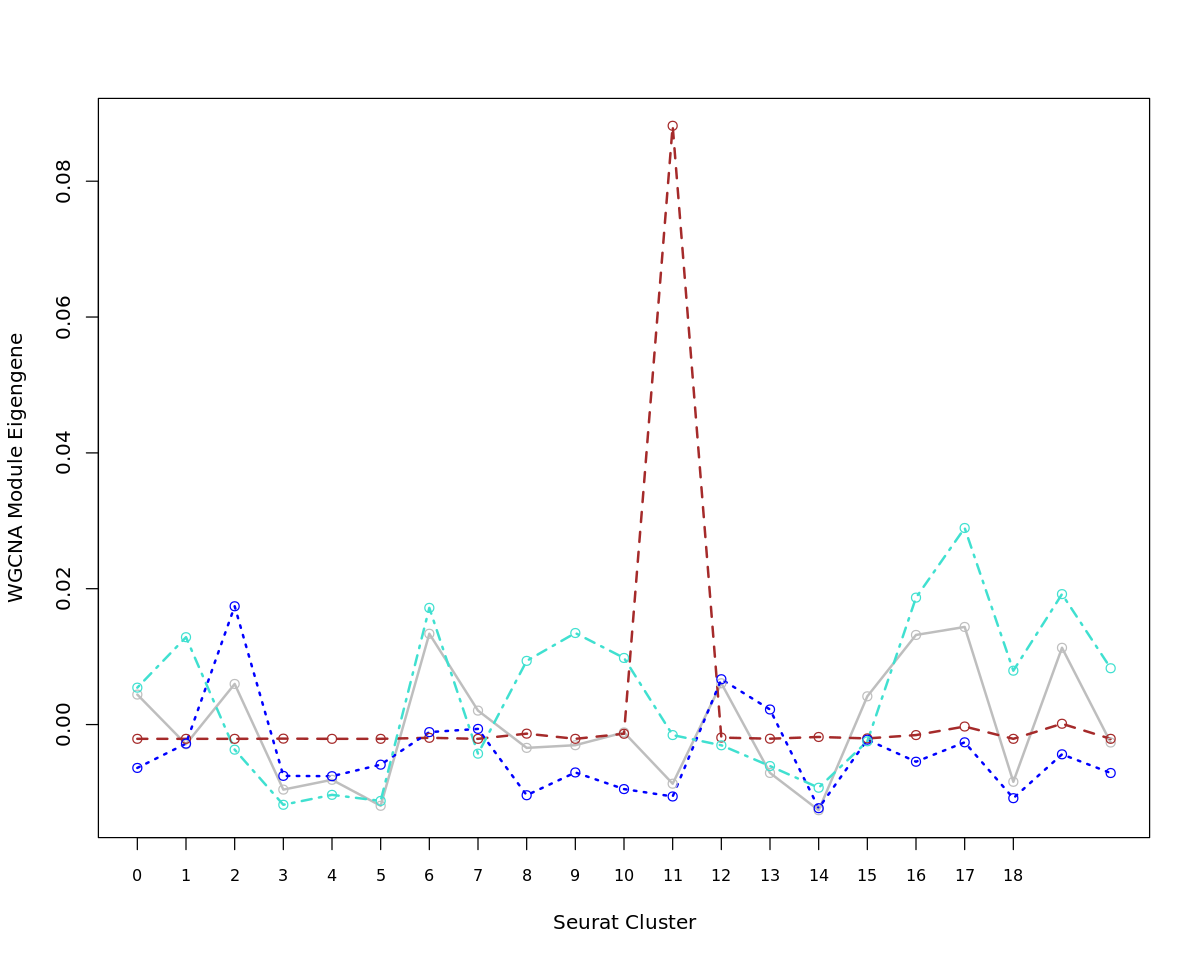

In [57]:
options(repr.plot.width=10, repr.plot.height=8)

f <- function(module){
  eigengene <- unlist(net$MEs[paste0("ME", module)])
  means <- tapply(eigengene, Idents(experiment.merged), mean, na.rm = T)
  return(means)
}
modules <- c("grey","brown",'blue','turquoise')
plotdat <- sapply(modules, f)
matplot(plotdat, col = modules, type = "l", lwd = 2, xaxt = "n", xlab = "Seurat Cluster",
        ylab = "WGCNA Module Eigengene")
axis(1, at = 1:19, labels = 0:18, cex.axis = 0.8)
matpoints(plotdat, col = modules, pch = 21)

In [58]:
options(repr.plot.width=10, repr.plot.height=8)

f <- function(module){
  eigengene <- unlist(net$MEs[paste0("ME", module)])
  means <- tapply(eigengene, Idents(experiment.merged), mean, na.rm = T)
  return(means)
}
modules <- c("grey","brown",'blue','turquoise')
plotdat <- sapply(modules, f)

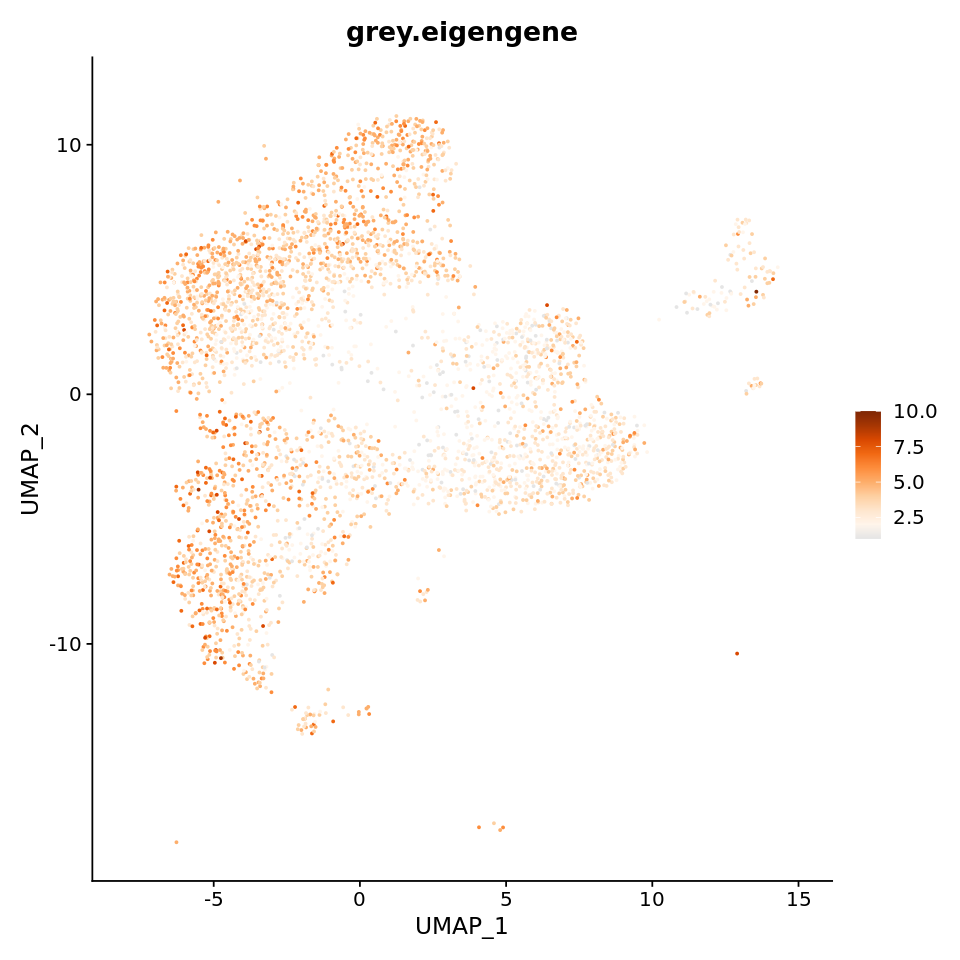

In [59]:
options(repr.plot.width=8, repr.plot.height=8)
grey.eigengene <- unlist(net$MEs[paste0("ME", "grey")])
names(grey.eigengene) <- rownames(datExpr)
experiment.merged$grey.eigengene <- grey.eigengene
FeaturePlot(experiment.merged, features = "grey.eigengene", cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges'))
    )

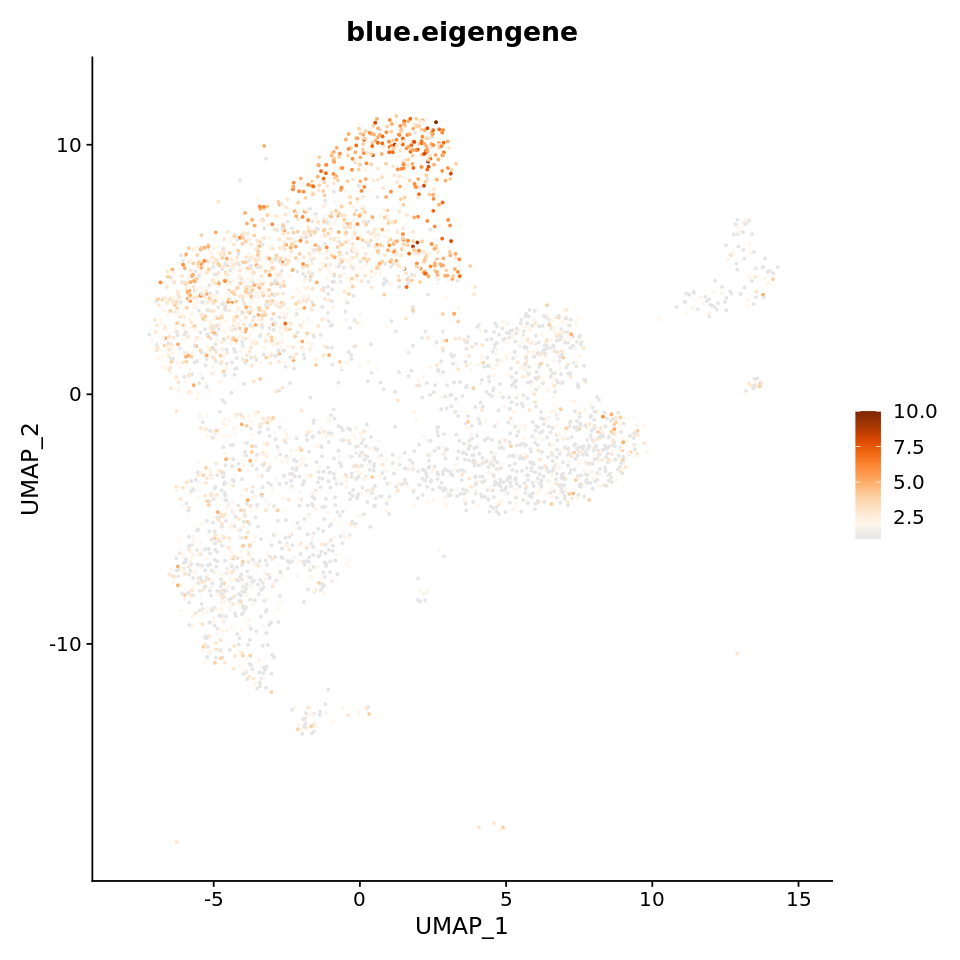

In [60]:
options(repr.plot.width=8, repr.plot.height=8)
blue.eigengene <- unlist(net$MEs[paste0("ME", "blue")])
names(blue.eigengene) <- rownames(datExpr)
experiment.merged$blue.eigengene <- blue.eigengene
FeaturePlot(experiment.merged, features = "blue.eigengene", cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges'))
    )

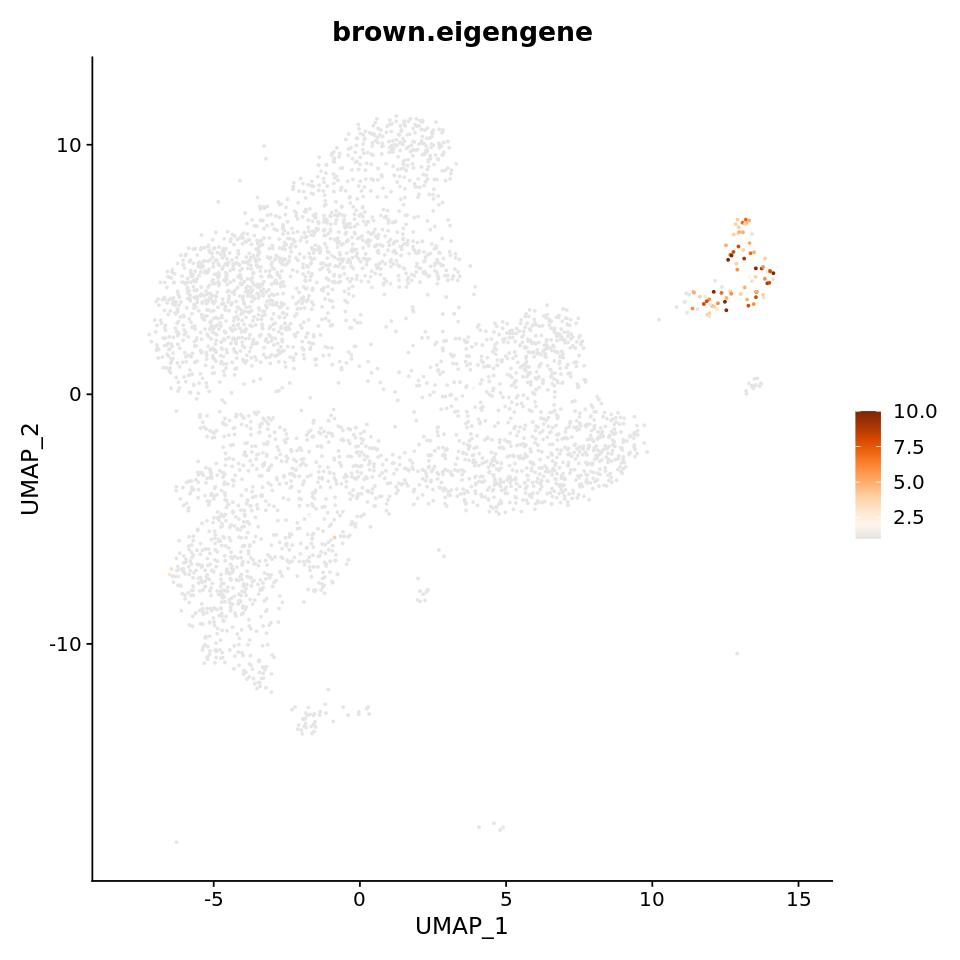

In [61]:
options(repr.plot.width=8, repr.plot.height=8)
brown.eigengene <- unlist(net$MEs[paste0("ME", "brown")])
names(brown.eigengene) <- rownames(datExpr)
experiment.merged$brown.eigengene <- brown.eigengene
FeaturePlot(experiment.merged, features = "brown.eigengene", cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges'))
    )

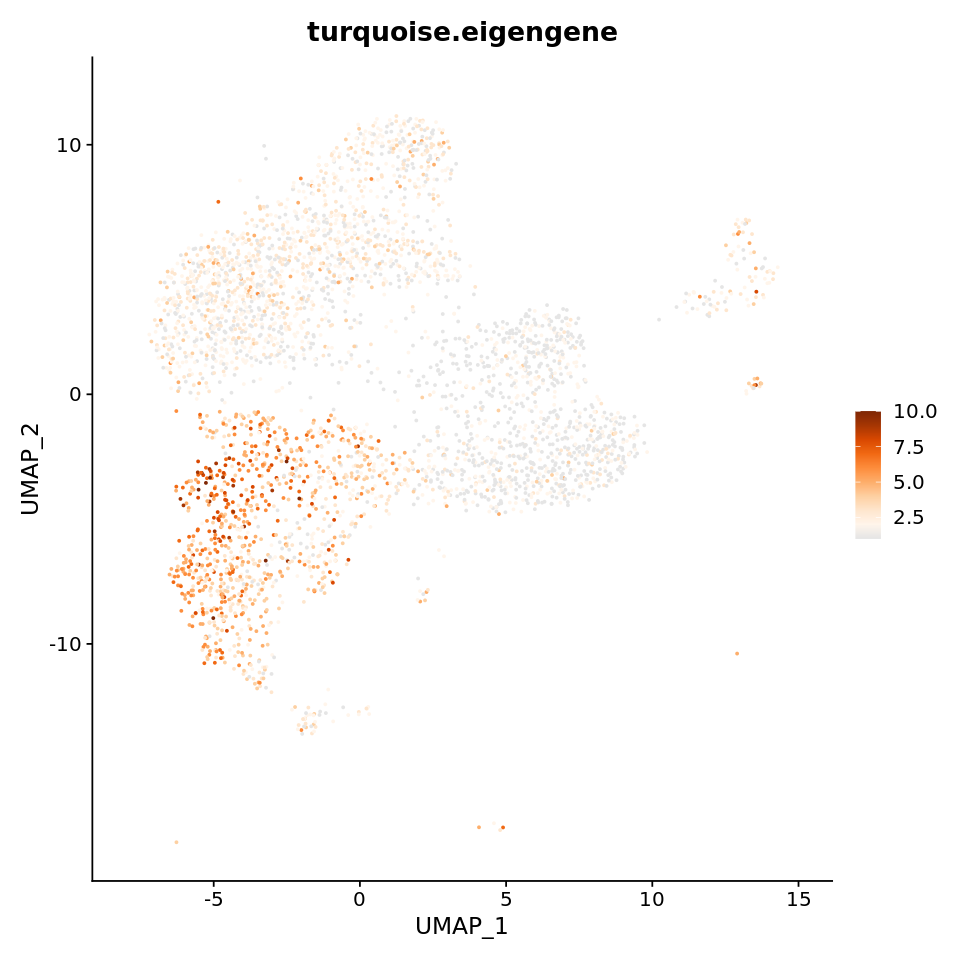

In [62]:
options(repr.plot.width=8, repr.plot.height=8)
turquoise.eigengene <- unlist(net$MEs[paste0("ME", "turquoise")])
names(turquoise.eigengene) <- rownames(datExpr)
experiment.merged$turquoise.eigengene <- turquoise.eigengene
FeaturePlot(experiment.merged, features = "turquoise.eigengene", cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges'))
    )

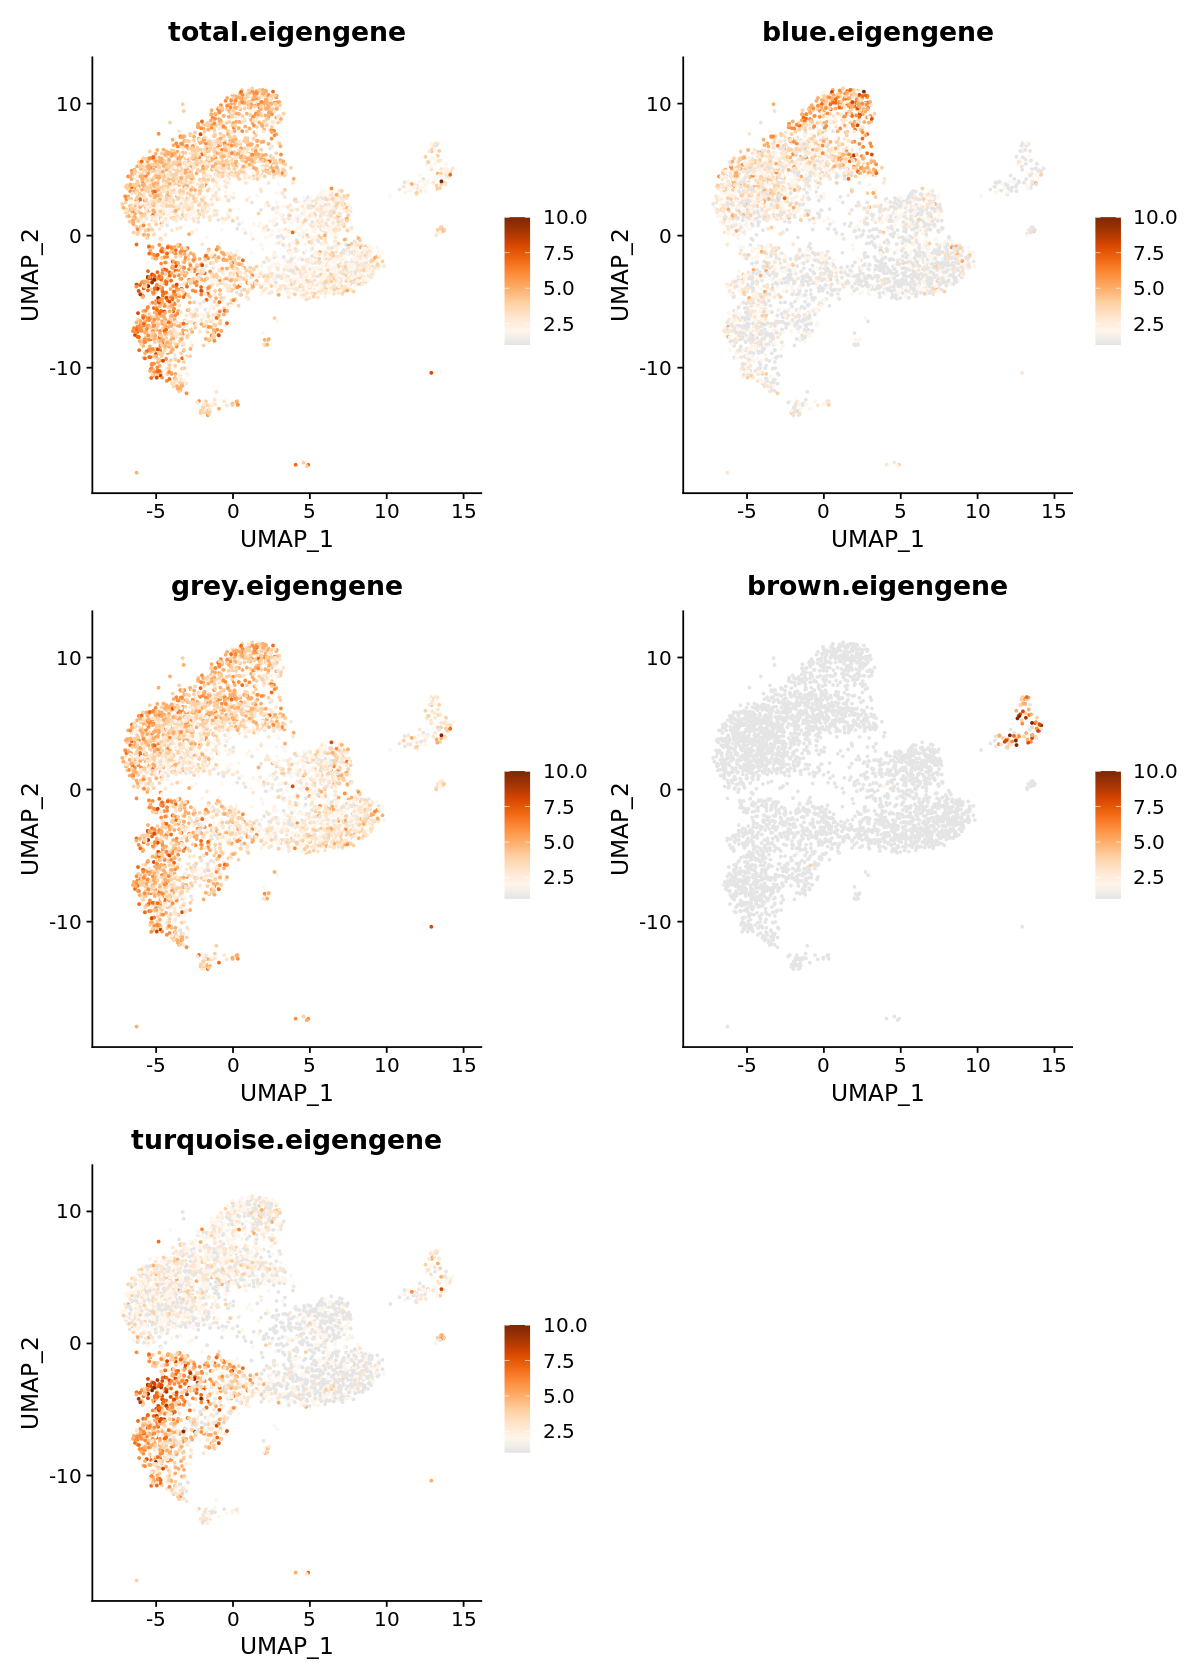

In [63]:
options(repr.plot.width=10, repr.plot.height=14)
FeaturePlot(experiment.merged, features = c("total.eigengene","blue.eigengene", "grey.eigengene", "brown.eigengene",
                                            "turquoise.eigengene")
           ,cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges')
           ))

# Figure 5e

In [65]:
moduleTraitCor <- list()
moduleTraitPvalue <- list()
header = as.character(experiment.merged@meta.data$cell_type) #as.character(paste(GB$Species,  GB$Time_point, GB$IDX))
for(i in unique(header)[order(unique(header))]){
  h <- header
  h[header != i] <- 0
  h[header == i] <- 1
  moduleTraitCor[[i]] <- cor(net$MEs, as.numeric(h), use = "p")
  moduleTraitPvalue[[i]] <- corPvalueStudent(moduleTraitCor[[i]], nrow(datExpr))
}

In [66]:
moduleTraitCor <- do.call(cbind, moduleTraitCor)
moduleTraitPvalue <- do.call(cbind, moduleTraitPvalue)
colnames(moduleTraitCor) <- sort(unique(header))
colnames(moduleTraitPvalue) <- sort(unique(header))
textMatrix = paste(signif(moduleTraitCor, 2), "\n(",
                   signif(moduleTraitPvalue, 1), ")", sep = "");

In [67]:
moduleTraitCor

,Astrocyte,Choroid,EN,IN-CTX-CGE,IN-CTX-MGE,IN-STR,IPC-div,IPC-nEN,MGE-div,MGE-IPC,⋯,Microglia,nEN-early,nEN-late,nIN,OPC,oRG,RG-div,RG-early,tRG,vRG
MEblue,-0.04356744,-0.01050744,0.49476781,-0.13654892,-0.13396262,-0.05439105,-0.01049503,-0.008885837,-0.07916025,-0.08688519,⋯,-0.09385852,0.16141590,0.04151512,-0.2277809,-0.01361650,-0.04451106,-0.043432669,-0.07946596,-0.044402958,-0.07115433
MEbrown,-0.01434003,-0.00787767,-0.05969927,-0.03746249,-0.03702309,-0.01935772,-0.01841197,-0.029136899,-0.01017672,-0.02589354,⋯,0.78154457,-0.04640306,-0.03900382,-0.0338206,-0.01246505,-0.01259192,-0.004802925,-0.01540682,0.001209725,-0.02096610
MEturquoise,0.03709052,0.04821629,-0.10496937,-0.21354082,-0.18232133,-0.10355235,0.16210765,-0.059402722,0.07132430,0.16607746,⋯,-0.01370670,-0.07379378,-0.11439891,-0.1720498,-0.01507571,0.15197561,0.480445921,0.05815233,0.194609747,0.08273112
MEgrey,0.03012744,-0.01085874,0.16984148,-0.17312891,-0.14326028,-0.11015950,0.12614777,0.028459160,-0.02611994,-0.03743996,⋯,-0.07717650,0.14703653,-0.13337234,-0.2333125,0.02541184,0.10729052,0.238566412,-0.06178197,0.114535690,-0.02637361


In [68]:
res <- reshape2::melt(moduleTraitPvalue)
to.plot <- reshape2::melt(moduleTraitCor)
to.plot$p_value <- res$value
#to.plot$value[to.plot$value <= 0] <- NA
unique(experiment.merged@meta.data$cell_type)

[1] tRG        RG-div     nEN-early  nEN-late   EN         vRG       
 [7] IN-CTX-CGE IPC-div    oRG        IPC-nEN    OPC        IN-CTX-MGE
[13] IN-STR     MGE-RG     nIN        MGE-IPC    MGE-div    Astrocyte 
[19] RG-early   Microglia  Choroid   
21 Levels: Astrocyte Choroid EN IN-CTX-CGE IN-CTX-MGE IN-STR ... vRG

In [69]:
to.plot$Var2 <- factor(to.plot$Var2, 
                       levels = c('Astrocyte','Choroid','EN','IN-CTX-CGE','IN-CTX-MGE','IN-STR',
                                  'IPC-div','IPC-nEN','MGE-div','MGE-IPC','MGE-RG','Microglia',
                                  'nEN-early','nEN-late','nIN','OPC','oRG','RG-div','RG-early','tRG','vRG'))

In [70]:
cell_type_modules = c('MEbrown','MEblue','MEturquoise','MEgrey')

Warning message:
“Removed 59 rows containing missing values (geom_point).”


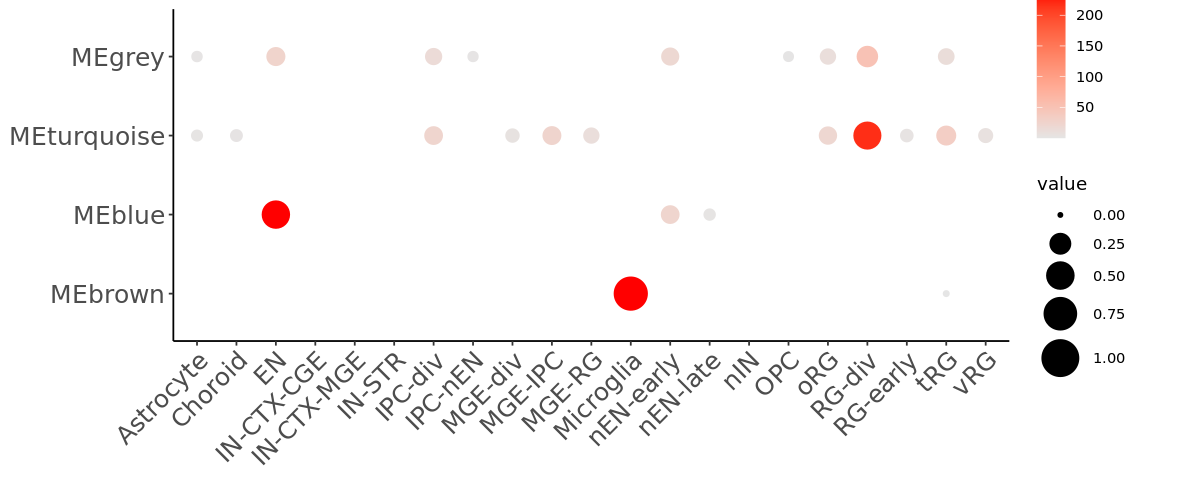

In [71]:
options(repr.plot.width = 10, repr.plot.height = 4)
to.plot %>%
    filter(Var1 %in% cell_type_modules) %>%
    mutate(Var1 = factor(Var1, 
                         levels=cell_type_modules,
                        labels = cell_type_modules)) %>%
    ggplot( aes(x = Var2, y = Var1, size = value, color = -log10(p_value))) +
      geom_point(na.rm = F) +
      scale_size_continuous(limits = c(0,1), range=c(1,10)) + 
      scale_color_continuous(low = "grey90", high = "Red", 
                             na.value = "red") +
      theme_classic()+
      theme(axis.title = element_blank(),
          axis.text.x = element_text(angle = 45,size=15,hjust = 1),
            axis.text.y = element_text(size=15),
            panel.grid.minor = element_line(color = "black"))

#purple: oligo